In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Prostate_Cancer.csv')

In [3]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


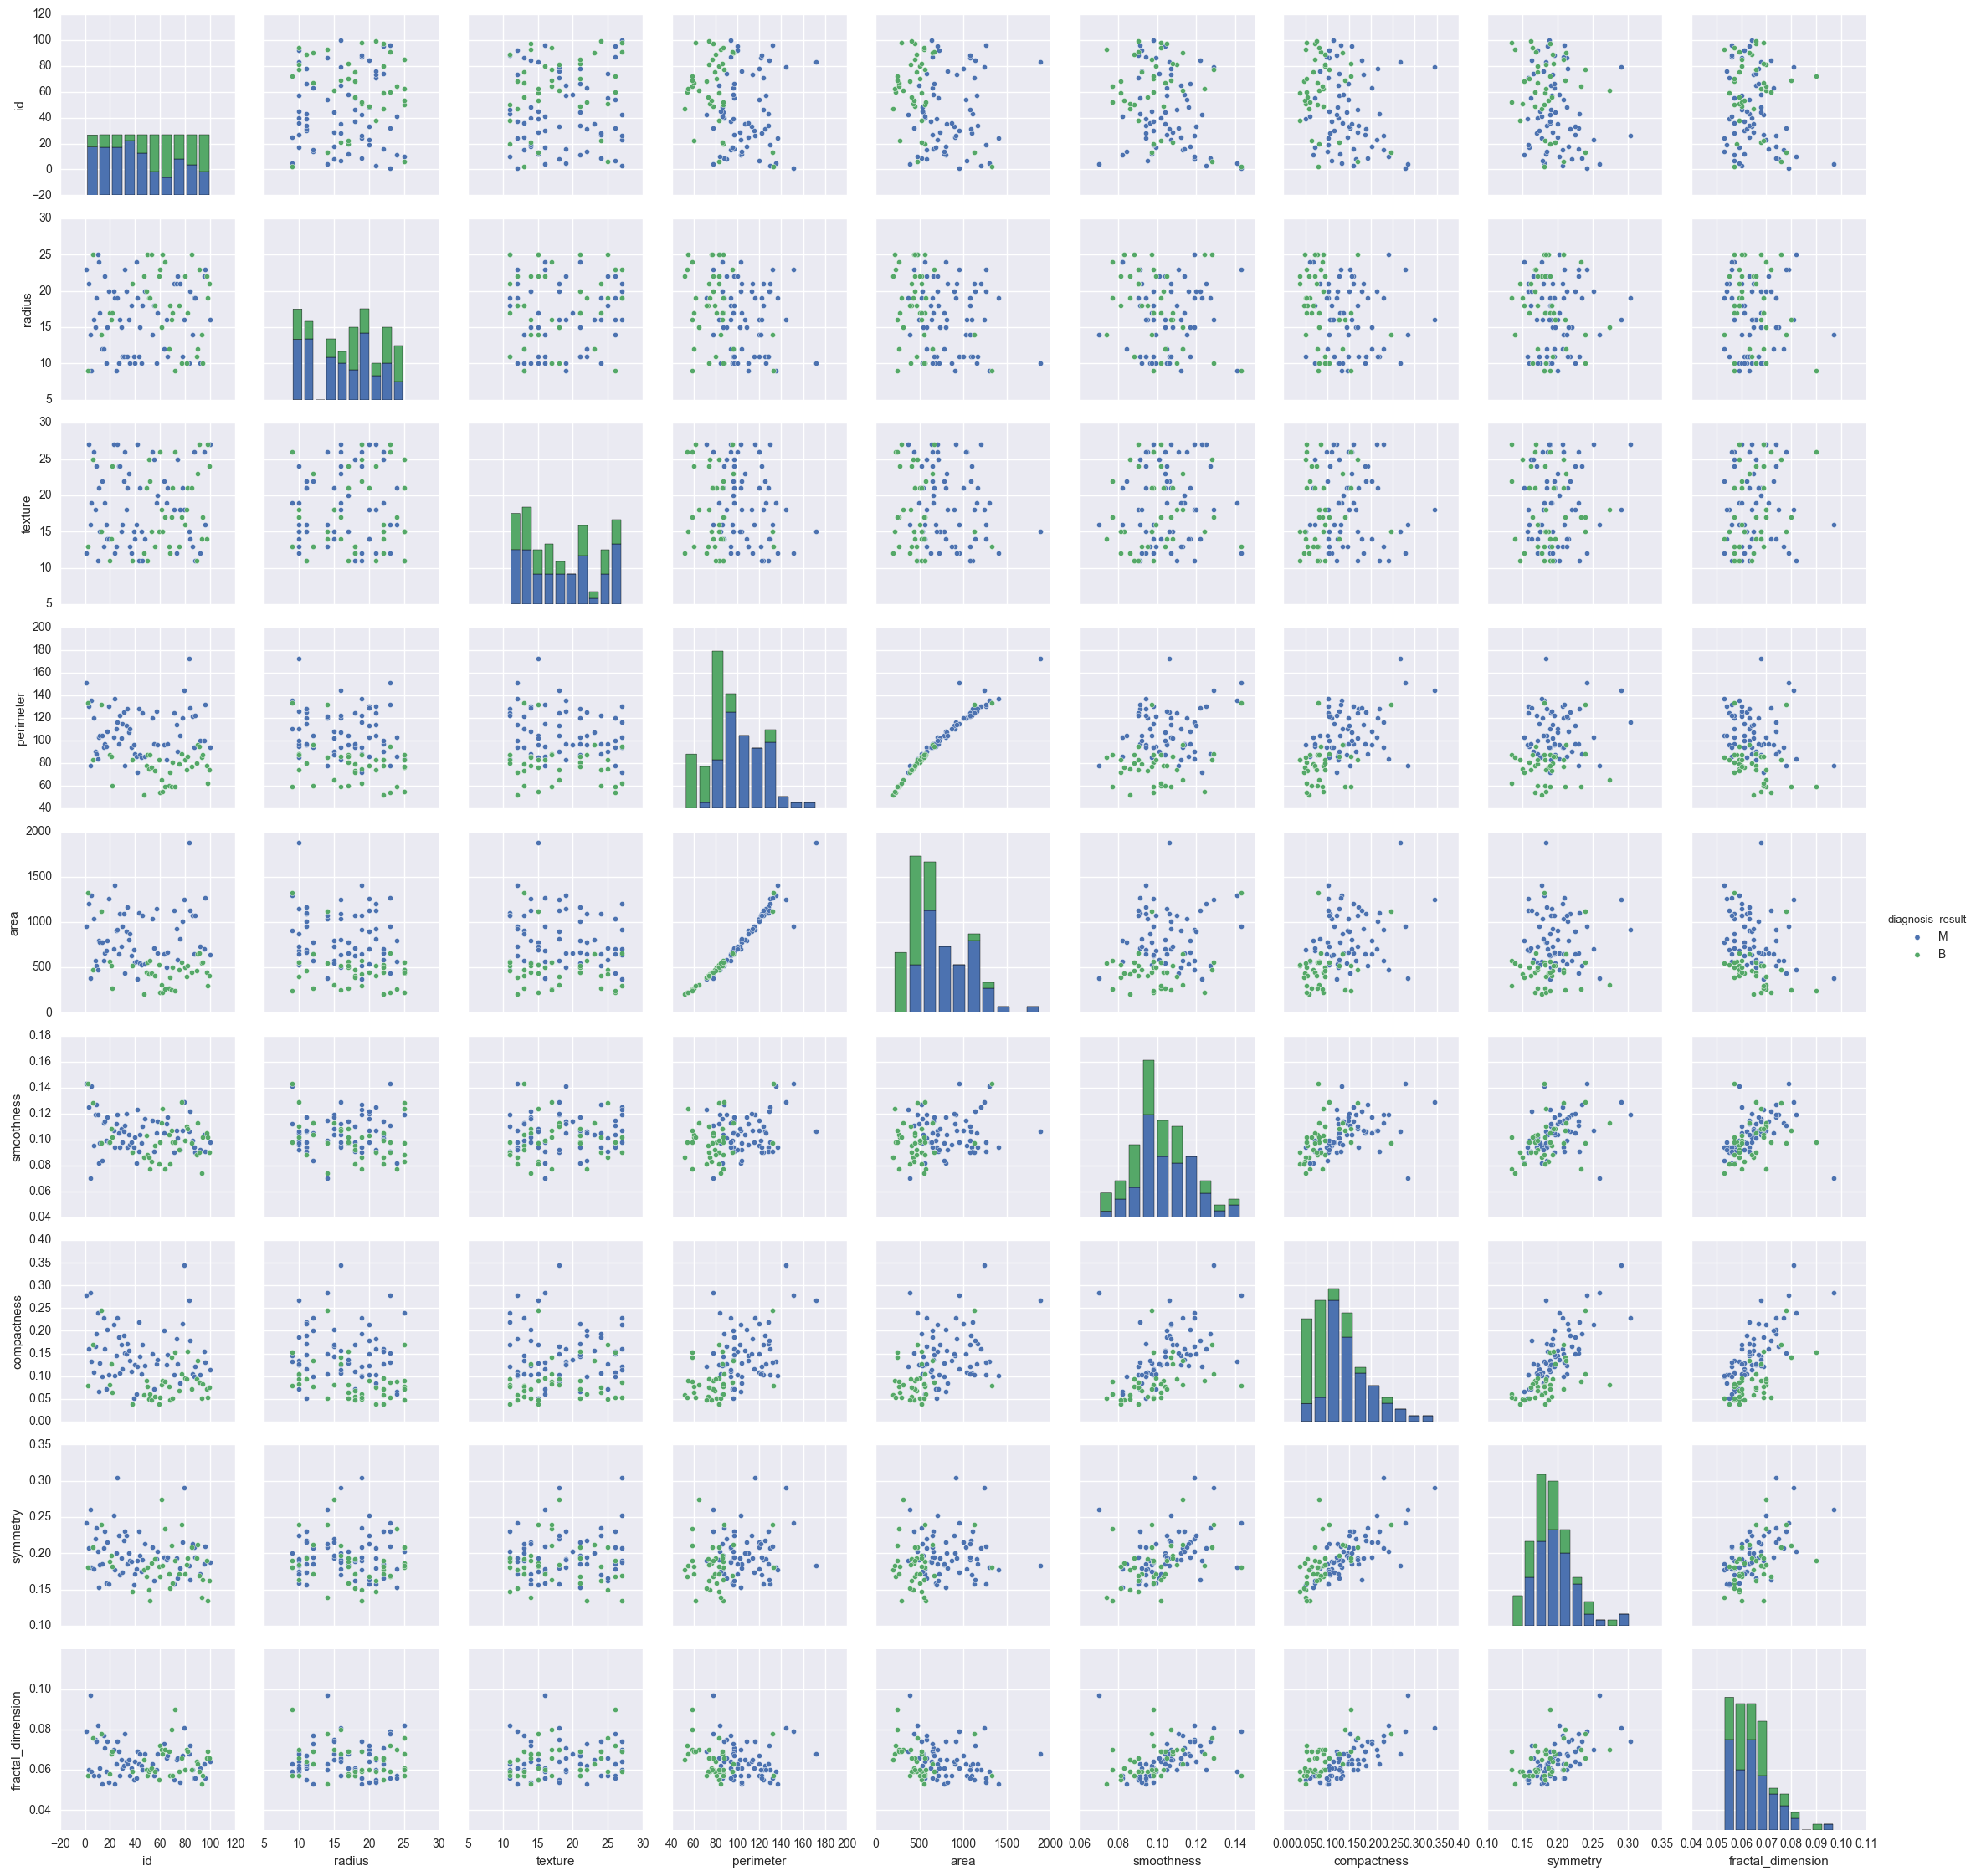

In [4]:
sns.pairplot(df, hue='diagnosis_result')

## Standardize the Variables

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [15]:
scaler.fit(df.drop(['diagnosis_result', 'id'], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
scaled_feat = scaler.transform(df.drop(['diagnosis_result', 'id'], axis=1))

In [18]:
df_feat = pd.DataFrame(scaled_feat, columns=['radius','texture','perimeter','area','smoothness','compactness','symmetry','fractal_dimension'])

In [19]:
df_feat.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1.266830,-1.205746,2.301611,0.789417,2.764210,2.486970,1.594151,1.764464
1,-1.617011,-1.012208,1.537520,1.958830,2.764210,-0.784061,-0.397314,-0.948199
2,0.854853,1.697335,1.410172,1.572169,1.528655,0.547364,0.451507,-0.578290
3,-0.587068,-0.431591,-0.797201,-0.996139,-2.246650,2.585594,2.181796,3.983916
4,-1.617011,0.149025,1.622419,1.867666,2.626926,0.103555,-0.397314,-0.701593


## Train test split  

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df_feat
y = df['diagnosis_result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Using KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [25]:
pred = knn.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[ 5  3]
 [ 5 20]]


             precision    recall  f1-score   support

          B       0.50      0.62      0.56         8
          M       0.87      0.80      0.83        25

avg / total       0.78      0.76      0.77        33



## Find K Value

In [29]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_test != pred_i))
    

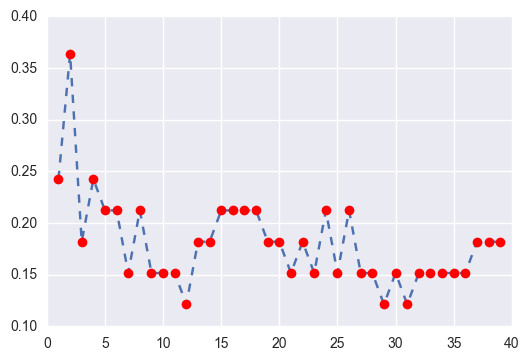

In [40]:
plt.plot(range(1,40), error_rate, linestyle='--', marker='o', markerfacecolor = 'red')
plt.xlabel='K Value'
plt.ylabel='Error rate'

In [41]:
knn = KNeighborsClassifier(n_neighbors=12)

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

In [43]:
pred_nk = knn.predict(X_test)

In [45]:
print(confusion_matrix(y_test, pred_nk))
print('\n')
print(classification_report(y_test, pred_nk))

[[ 6  2]
 [ 2 23]]


             precision    recall  f1-score   support

          B       0.75      0.75      0.75         8
          M       0.92      0.92      0.92        25

avg / total       0.88      0.88      0.88        33



In [46]:
knn.score(X_test, y_test)

0.87878787878787878

# Random Forrect classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rfc = RandomForestClassifier(n_estimators=100)

In [66]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [67]:
pred_rfc = rfc.predict(X_test)

In [68]:
print(confusion_matrix(y_test, pred_rfc))
print('\n')
print(classification_report(y_test, pred_rfc))

[[ 5  3]
 [ 5 20]]


             precision    recall  f1-score   support

          B       0.50      0.62      0.56         8
          M       0.87      0.80      0.83        25

avg / total       0.78      0.76      0.77        33



In [69]:
rfc.score(X_test, y_test)

0.75757575757575757